<a href="https://colab.research.google.com/github/thatguyandy27/DLWithPython/blob/main/chapter8/Chapter8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Downloading the code from kaggle.

In [ ]:
from google.colab import files
files.upload()

In [4]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c dogs-vs-cats

 97% 785M/812M [00:02<00:00, 190MB/s]
100% 812M/812M [00:02<00:00, 288MB/s]


In [5]:
!unzip -qq dogs-vs-cats.zip

In [6]:
!unzip -qq train.zip

Splitting the images into datasets

In [7]:
import os, shutil, pathlib

In [8]:
original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

In [9]:
def make_subset(subset_name, start_index, end_index):
  # for cat and dog
  for category in ("cat", "dog"):
    dir = new_base_dir / subset_name / category
    os.makedirs(dir)
    # filename is cat/dog.number.jpg
    fnames = [f"{category}.{i}.jpg"
              for i in range(start_index, end_index)]
    
    # for each file copy 
    for fname in fnames:
      shutil.copyfile(src=original_dir / fname, dst=dir / fname)

  


In [10]:
make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

Building the model.  Data is in train/test/validation folders under cat/dog folders.

In [26]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import image_dataset_from_directory

import matplotlib.pyplot as plt

In [19]:
inputs = keras.Input(shape= (180, 180, 3))
x = layers.Rescaling(1. / 255.)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)

outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)


In [20]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                       

In [21]:
model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [22]:
train_dataset = image_dataset_from_directory( new_base_dir / "train", image_size=(180, 180), batch_size=32)
validation_dataset = image_dataset_from_directory( new_base_dir / "validation", image_size=(180, 180), batch_size= 32)
test_dataset = image_dataset_from_directory( new_base_dir / "test", image_size=(180, 180), batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [23]:
# check shape
for data_batch, labels_batch in train_dataset:
  print("data batch shape: ", data_batch.shape)
  print("labels batch shape: ", labels_batch.shape)
  break

data batch shape:  (32, 180, 180, 3)
labels batch shape:  (32,)


In [24]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss"
    )
]

In [25]:
history = model.fit(train_dataset, epochs=30, validation_data=validation_dataset, callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 5s 71ms/step - loss: 0.7112 - accuracy: 0.5220 - val_loss: 0.6915 - val_accuracy: 0.5870
Epoch 2/30
63/63 [==============================] - 5s 69ms/step - loss: 0.7184 - accuracy: 0.5560 - val_loss: 0.6802 - val_accuracy: 0.6270
Epoch 3/30
63/63 [==============================] - 5s 69ms/step - loss: 0.6740 - accuracy: 0.6055 - val_loss: 0.6647 - val_accuracy: 0.5880
Epoch 4/30
63/63 [==============================] - 5s 68ms/step - loss: 0.6496 - accuracy: 0.6325 - val_loss: 0.6733 - val_accuracy: 0.5940
Epoch 5/30
63/63 [==============================] - 5s 69ms/step - loss: 0.6137 - accuracy: 0.6770 - val_loss: 0.6213 - val_accuracy: 0.6550
Epoch 6/30
63/63 [==============================] - 5s 68ms/step - loss: 0.5801 - accuracy: 0.6970 - val_loss: 0.5900 - val_accuracy: 0.6880
Epoch 7/30
63/63 [==============================] - 5s 70ms/step - loss: 0.5482 - accuracy: 0.7300 - val_loss: 0.5732 - val_accuracy: 0.7020
Epoch 8/30
63

In [2]:
!pwd

/content


In [27]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)


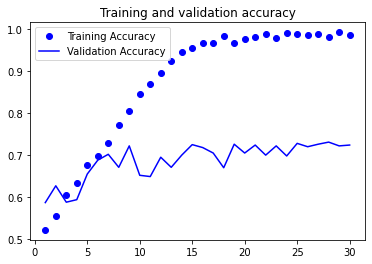

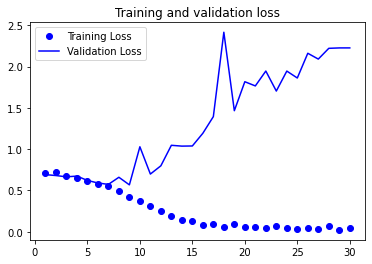

In [28]:
plt.plot(epochs, accuracy, "bo", label="Training Accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation Accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()


In [30]:
#test accuracy
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_accuracy = test_model.evaluate(test_dataset)


63/63 [==============================] - 3s 36ms/step - loss: 0.5957 - accuracy: 0.6985
Test accuracy: (test_acc:.3f)


In [31]:
print(f"Test accuracy: {test_accuracy:.3f}")

Test accuracy: 0.698
